In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
from scipy import stats

import model
# import model as model
%load_ext snakeviz

In [2]:
R0 = 2.0
R_norm = stats.skewnorm.pdf(np.arange(0,12,1./24), 1., 4., 2.5)/24
R_norm /= R_norm.sum()
R_cum = np.cumsum(R_norm)
t = np.arange(R_norm.size)
DURATION = R_norm.size
R_norm.sum()

1.0

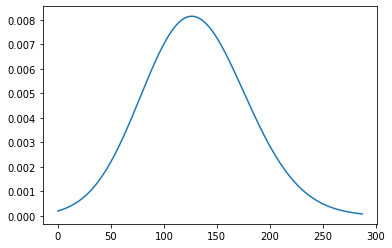

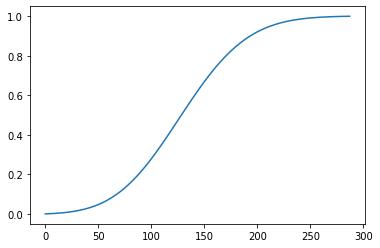

In [3]:
plt.figure()
plt.plot(t, R_norm)

plt.figure()
plt.plot(t, R_cum)


In [4]:
def draw_random_test(R_cum_tot=R_cum, t_cutoff=-1):
    if t_cutoff <0:
        R_cum = R_cum_tot
    else:
        # maybe an off by 1 error here
        R_cum = R_cum_tot[:t_cutoff]
        R_cum /= R_cum[-1]
        
    days = np.arange(R_cum.size)
    iwhere = np.where(np.random.rand()<=R_cum)[0][0]
    t_draw = days[iwhere]
    return t_draw


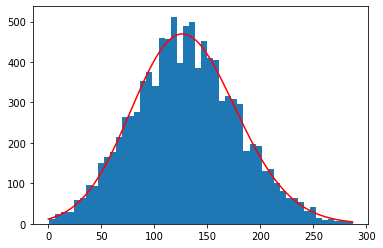

In [66]:
Ndraw = 10000
test_time = np.zeros(Ndraw)

for i in np.arange(Ndraw):
    test_time[i] = draw_random_test()
    
    
plt.figure()
plt.hist(test_time,50)
plt.plot(t, Ndraw*len(t)/50*R_norm, 'r-')

## Trace history of patient0 backwards
- follow until exceeding duration
- for last ancestor, contact tracing fails

In [6]:
def trace_patient0_hist(DURATION=DURATION):
    t=0

    t_test = []
    t_inf = []
    
    while t> -DURATION:
        t_test.append(t)
        dt_test = draw_random_test()
        t -= dt_test
        t_inf.append(t)
        
    t_test = np.array(t_test)
    t_inf = np.array(t_inf)
    return t_test, t_inf

In [19]:
t_test, t_inf = trace_patient0_hist()
t_test_ancestors = t_test[:-1]
t_inf_ancestors = t_inf[:-1]
print(len(t_test)-1)
print(t_test_ancestors)
print(t_inf_ancestors)

plt.figure()
plt.plot(t_test, 'ko', label='test')
plt.plot(t_inf, 'ro', label='infect')
plt.plot([0, len(t_inf)-1], -DURATION*np.ones(2), 'k--')
plt.legend()

4
[   0  -47  -93 -205]
[ -47  -93 -205 -283]


In [154]:
G = nx.DiGraph()

curr_case = 0
for it_test, it_inf in zip(t_test_ancestors, t_inf_ancestors):
    complete=False
    if curr_case==0:
        complete=True
    else:
        it_test = np.nan
        
    G.add_node(curr_case, t_infect=it_inf, t_test=it_test, complete=complete)
    if curr_case<0:
        G.add_edge(curr_case, curr_case+1)
    curr_case -= 1

In [155]:
nx.draw_networkx(G, with_label = True, node_color ='green') 

In [156]:
list(G.nodes(data=True))

[(0, {'complete': True, 't_infect': -47, 't_test': 0}),
 (-1, {'complete': False, 't_infect': -93, 't_test': nan}),
 (-2, {'complete': False, 't_infect': -205, 't_test': nan}),
 (-3, {'complete': False, 't_infect': -283, 't_test': nan})]

# Trace all decendendents forward to patient0

In [23]:
def get_incomplete_cases(G):
    cases = [case for (case, complete) in G.nodes(data='complete') if not complete]
    return cases

In [140]:

def draw_num_infected(infect_expect, min_descendants=0):
    n_infect = 0
    while n_infect <= min_descendants:
        n_infect = np.random.poisson(lam=infect_expect)
    
    return n_infect



In [142]:
cases = get_incomplete_cases(G)
cases

[-1, -2, -3]

In [143]:
icase_num = cases[0]
icase = G.nodes[icase_num]
icase

t_cutoff = -icase['t_infect']
infect_expect = R0*R_cum[t_cutoff]
infect_expect

existing_descendants = len(nx.descendants(G, icase_num))
# print(existing_descendants)

infection_num = draw_num_infected(infect_expect, min_descendants=existing_descendants)
extra_cases = infection_num - existing_descendants
extra_cases

# determine infection time for each extra case
# R_cum
t_ellapse = draw_random_test(t_cutoff=t_cutoff)
t_ellapse

t_inf_child = icase['t_infect']+t_ellapse
t_inf_child

if extra_cases==0:
    complete = True
else:
    complete = False

G.add_node(curr_case, t_infect=t_inf_child, t_test=np.nan, complete=complete)

{'complete': False, 't_infect': -93, 't_test': -47}

0.4635043847266708

1

In [150]:
# t_cutoff

In [151]:
# partial = np.array([draw_random_test(t_cutoff=t_cutoff) for i in range(10000)])
# 
# plt.figure()
# plt.hist(partial,30)

55

-10

In [153]:
curr_case

-4

In [ ]:
icase[]

In [ ]:
# put inside while loop until no incomplete cases

cases = get_incomplete_cases(G)
for icase_num in cases:
    icase_num = cases[0]
    icase = G.nodes[icase_num]
    icase
    
    t_cutoff = -icase['t_infect']
    infect_expect = R0*R_cum[t_cutoff]
    infect_expect
    
    existing_descendants = len(nx.descendants(G, icase_num))
    # print(existing_descendants)
    
    infection_num = draw_num_infected(infect_expect, min_descendants=existing_descendants)
    extra_cases = infection_num - existing_descendants
    extra_cases
    
    if extra_cases==0:
        icase['complete'] = True
    
    # determine infection time for each extra case
    # R_cum
    for iextra_case in range(extra_cases):
        t_ellapse = draw_random_test(t_cutoff=t_cutoff)
        t_ellapse
        
        t_inf_child = icase['t_infect']+t_ellapse
        t_inf_child
        
        if extra_cases==0:
            complete = True
        else:
            complete = False
        
        # add all extra cases to tree (with complete=False flag)
        G.add_node(curr_case, t_infect=t_inf_child, t_test=np.nan, complete=False)
        curr_case += 1
    
    
    
    
    


In [145]:

while True: 
    cases = get_incomplete_cases(G)
    for icase in cases:
        icase = G.nodes[case]
        
        # calc time till cutoff (at t=0) from infection time
        t_cutoff = -t_inf_ancestors
        # calc expectation value for number of infections
        infect_expectation = R0*R_cum[t_cutoff]
        
        
        # draw random number of extra cases
        infection_num = draw_num_infected(infect_expect)
        extra_cases = infection_num - 1
        # determine infection time for each extra case
        # add all extra cases to tree (with complete=False flag)
        
        # G.add_node(curr_case, t_infect=it_inf, t_test=it_test, complete=complete)
        # curr_case
        
        
    # escape loop if all cases complete
    if len(cases)==0:
        break
    
    

KeyboardInterrupt: 